In [1]:
import pandas as pd

df = pd.read_csv("teste_indicium_precificacao.csv")

In [2]:
#dando uma analise nos dados importados

df.shape

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48894 entries, 0 to 48893
Data columns (total 16 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   id                             48894 non-null  int64  
 1   nome                           48878 non-null  object 
 2   host_id                        48894 non-null  int64  
 3   host_name                      48873 non-null  object 
 4   bairro_group                   48894 non-null  object 
 5   bairro                         48894 non-null  object 
 6   latitude                       48894 non-null  float64
 7   longitude                      48894 non-null  float64
 8   room_type                      48894 non-null  object 
 9   price                          48894 non-null  int64  
 10  minimo_noites                  48894 non-null  int64  
 11  numero_de_reviews              48894 non-null  int64  
 12  ultima_review                  38842 non-null 

In [3]:
df.isnull().sum()


id                                   0
nome                                16
host_id                              0
host_name                           21
bairro_group                         0
bairro                               0
latitude                             0
longitude                            0
room_type                            0
price                                0
minimo_noites                        0
numero_de_reviews                    0
ultima_review                    10052
reviews_por_mes                  10052
calculado_host_listings_count        0
disponibilidade_365                  0
dtype: int64

In [4]:
df.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
1,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129


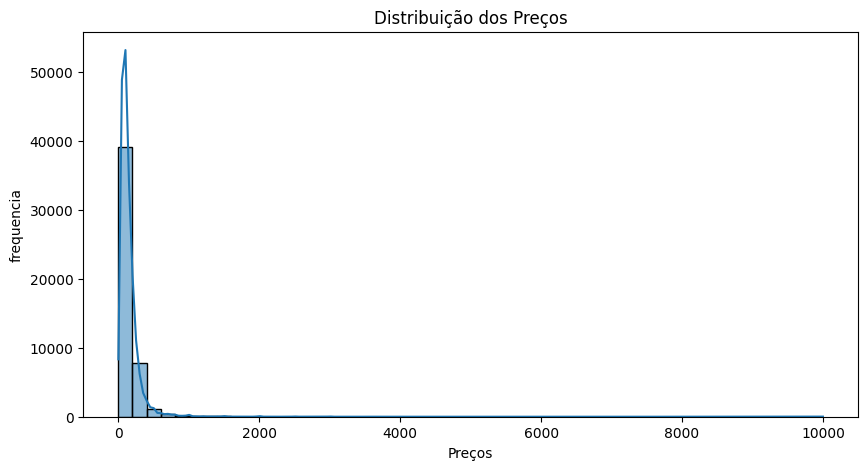

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,5))
sns.histplot(df["price"], bins=50, kde=True)
plt.title("Distribuição dos Preços")
plt.xlabel("Preços")
plt.ylabel("frequencia")
plt.show()

In [6]:
df_por_bairro = df.groupby("bairro")["price"].mean().round(2).reset_index()


df_por_bairro = df_por_bairro.sort_values(by="price", ascending=False)

print(df_por_bairro.head(10)) 
print(df_por_bairro.tail(10)) 

#vendo a relação dos preços por bairros os mais caros e mais baratos


                bairro   price
82      Fort Wadsworth  800.00
219            Woodrow  700.00
197            Tribeca  490.64
174           Sea Gate  487.86
167          Riverdale  442.09
157       Prince's Bay  409.50
6    Battery Park City  367.56
75   Flatiron District  341.92
161      Randall Manor  336.00
144               NoHo  295.72
             bairro  price
135      Mount Eden  58.50
46          Concord  58.19
88       Grant City  57.67
142  New Dorp Beach  57.40
24        Bronxdale  57.11
141        New Dorp  57.00
179       Soundview  53.47
196         Tremont  51.55
102     Hunts Point  50.50
27      Bull's Head  47.33


In [7]:
import folium
from folium.plugins import HeatMap

mapa = folium.Map(location=[40.7128, -74.0060], zoom_start=11)

data_latitude = df[["latitude", "longitude", "price"]].values
HeatMap(data_latitude, radius=10).add_to(mapa)

mapa

In [8]:

df_grouped = df.groupby(["bairro", "room_type"])["price"].mean().round(2).reset_index()

df_pivot = df_grouped.pivot(index="bairro", columns="room_type", values="price")
df_pivot = df_pivot.sort_values(by="Entire home/apt" , ascending=False)

df_pivot

#analisando por tipo de room

room_type,Entire home/apt,Private room,Shared room
bairro,,,
Fort Wadsworth,800.00,NaN,NaN
Woodrow,700.00,NaN,NaN
Randall Manor,651.00,56.89,13.0
Sea Gate,649.40,84.00,NaN
Tribeca,561.82,191.26,NaN
...,...,...,...
Breezy Point,NaN,213.33,NaN
Bull's Head,NaN,47.33,NaN
Co-op City,NaN,77.50,NaN


In [9]:
df_pivot = df_pivot.sort_values(by="Private room" , ascending=False)
df_pivot

room_type,Entire home/apt,Private room,Shared room
bairro,,,
Riverdale,141.50,803.50,800.00
Midtown,301.27,244.43,98.13
Jamaica Estates,172.27,223.00,NaN
Breezy Point,NaN,213.33,NaN
West Village,278.72,205.65,180.00
...,...,...,...
"Bay Terrace, Staten Island",102.50,NaN,NaN
Howland Hook,100.00,NaN,NaN
Richmondtown,78.00,NaN,NaN


In [10]:
df_pivot = df_pivot.sort_values(by="Shared room" , ascending=False)
df_pivot

room_type,Entire home/apt,Private room,Shared room
bairro,,,
Riverdale,141.50,803.50,800.0
Vinegar Hill,224.04,96.10,250.0
Financial District,242.75,165.62,208.1
Little Italy,291.00,95.71,207.5
West Village,278.72,205.65,180.0
...,...,...,...
"Bay Terrace, Staten Island",102.50,NaN,NaN
Howland Hook,100.00,NaN,NaN
Richmondtown,78.00,NaN,NaN


In [11]:
#TRATAMENTO DOS DADOS

import numpy as np

df_filtrado = df[df["price"] > 0].copy()

df_sem_outliers = pd.DataFrame()

for bairro, sub_df in df_filtrado.groupby("bairro"):
    Q1 = sub_df["price"].quantile(0.25)
    Q3 = sub_df["price"].quantile(0.75)
    IQR = Q3 - Q1

    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR

    df_bairro_filtrado = sub_df[(sub_df["price"] >= limite_inferior) & (sub_df["price"] <= limite_superior)]

    df_sem_outliers = pd.concat([df_sem_outliers, df_bairro_filtrado])



df_sem_outliers.reset_index(drop=True, inplace=True)

df_sem_outliers = df_sem_outliers.sort_values(by="price" , ascending=False)
df_sem_outliers.head()


,id,nome,host_id,host_name,bairro_group,bairro,latitude,longitude,room_type,price,minimo_noites,numero_de_reviews,ultima_review,reviews_por_mes,calculado_host_listings_count,disponibilidade_365
33981,2261367,brooklyn 14 bedroom gated community,10416706,Tzvi,Brooklyn,Sea Gate,40.57645,-74.01065,Entire home/apt,1485,2,6,2019-06-30,0.24,1,260
33985,32740761,My place 4 u,181889371,David,Brooklyn,Sea Gate,40.57919,-74.00635,Entire home/apt,1315,10,0,NaN,NaN,1,0
36174,15140627,Stunning 4 Bed Tribeca Penthouse w/ Huge Terrace!,30283594,Kara,Manhattan,Tribeca,40.72125,-74.00691,Entire home/apt,894,30,0,NaN,NaN,121,280
36194,21948560,Luxury Skyline Views! Best Panaromic Views Of ...,23001368,Sofia,Manhattan,Tribeca,40.71735,-74.00605,Entire home/apt,850,2,14,2019-06-19,0.76,1,36
36156,9857920,SWING FROM THE CHANDELIER,29941633,William,Manhattan,Tribeca,40.71454,-74.00816,Entire home/apt,850,4,0,NaN,NaN,1,0


In [12]:
df_grouped2 = df_sem_outliers.groupby(["bairro", "room_type"])["price"].mean().round(2).reset_index()

df_pivot2 = df_grouped2.pivot(index="bairro", columns="room_type", values="price")

df_pivot2 = df_pivot2.sort_values(by="Entire home/apt" , ascending=False)

print(df_pivot2)

room_type          Entire home/apt  Private room  Shared room
bairro                                                       
Fort Wadsworth              800.00           NaN          NaN
Woodrow                     700.00           NaN          NaN
Sea Gate                    649.40         84.00          NaN
Tribeca                     350.49        151.61          NaN
Flatiron District           287.63        142.27          NaN
...                            ...           ...          ...
Hunts Point                    NaN         44.65          NaN
Mount Eden                     NaN         40.20          NaN
New Brighton                   NaN         65.00          NaN
Olinville                      NaN        102.50         25.5
South Beach                    NaN         69.83         20.0

[221 rows x 3 columns]


In [13]:
#Supondo que uma pessoa esteja pensando em investir em um apartamento para alugar na plataforma, onde seria mais indicada a compra?
#o melhor bairro_group em geral é manhattan e os melhores bairros para investir seriam Stuyvesant Town e Theater District


df_sem_outliers["receita_estadia"] = df_sem_outliers["price"] * df_sem_outliers["minimo_noites"]
df_sem_outliers["receita_mensal"] = df_sem_outliers["receita_estadia"] * df_sem_outliers["reviews_por_mes"]

df_analise = df_sem_outliers.groupby(["bairro_group" , "bairro", "room_type"])[["receita_mensal"]].mean().reset_index()

df_analise = df_analise.sort_values(by=["room_type", "receita_mensal"], ascending=[True, False])

for room_type, group in df_analise.groupby("room_type"):
    print(f"\nTop 10 bairros para {room_type}:")
    print(group.head(10))
    print("\n" + "="*50)

#a minha analise para melhor local foi baseada na rentabilidade dos imoveis por bairro
#calculada pensando no price x o minimo da estadia para o valor de uma estadia 
#e considerando o numero de revies por mes a quantidade media de pessoas hospedadas
#alguns bairros menos famosos podem aparecer devido a poucos imoveis mas com rentabilidade alta(talvez imoves de luxo com clientes recorrentes)


Top 10 bairros para Entire home/apt:
      bairro_group             bairro        room_type  receita_mensal
310      Manhattan    Stuyvesant Town  Entire home/apt     2773.275000
301      Manhattan             Nolita  Entire home/apt     2662.672097
483  Staten Island        Great Kills  Entire home/apt     2490.676000
262      Manhattan  Flatiron District  Entire home/apt     1754.218222
14           Bronx  Claremont Village  Entire home/apt     1687.910000
316      Manhattan            Tribeca  Entire home/apt     1664.720658
313      Manhattan   Theater District  Entire home/apt     1606.274697
279      Manhattan           Kips Bay  Entire home/apt     1502.790327
90           Bronx     Spuyten Duyvil  Entire home/apt     1468.860000
299      Manhattan               NoHo  Entire home/apt     1465.322037


Top 10 bairros para Private room:
      bairro_group              bairro     room_type  receita_mensal
314      Manhattan    Theater District  Private room     1511.261831
516  St

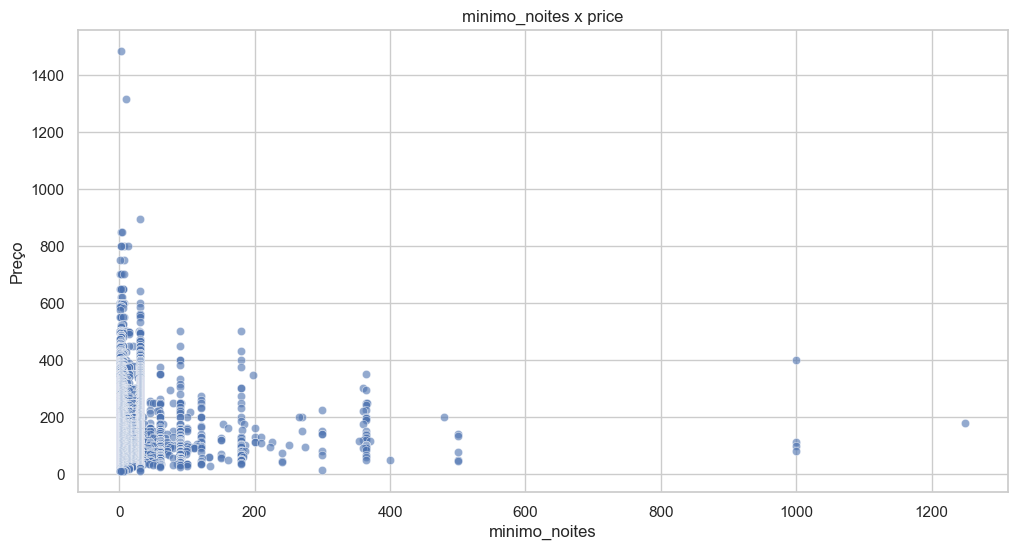

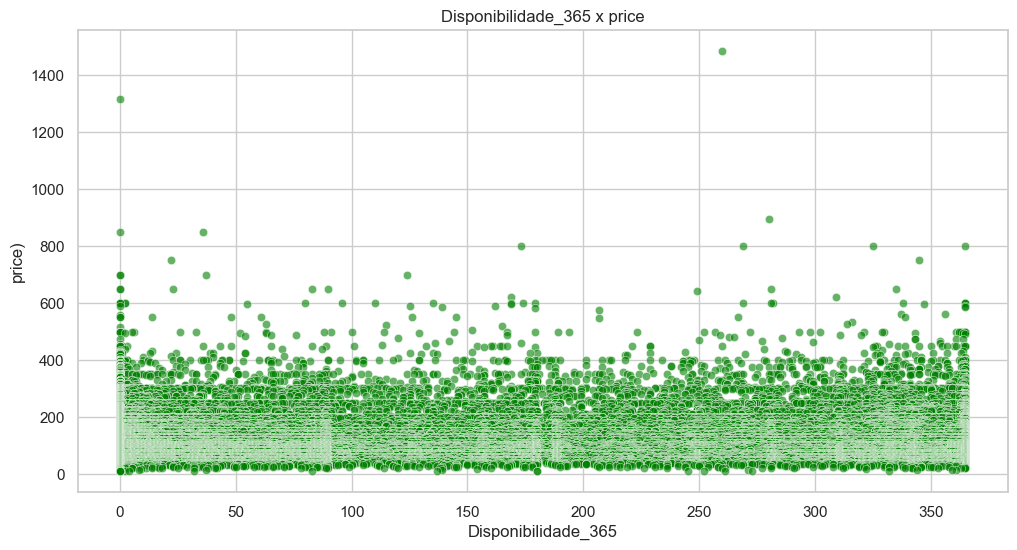

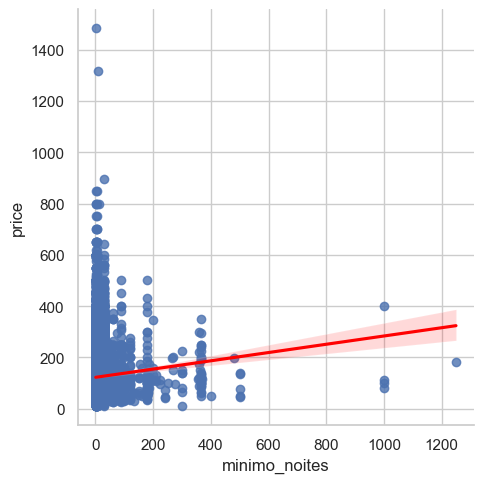

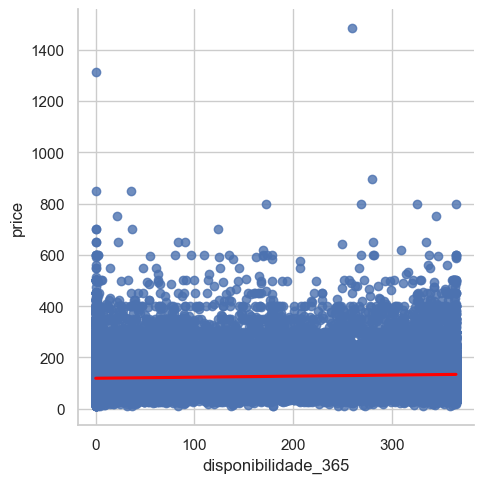

In [14]:
#O número mínimo de noites e a disponibilidade ao longo do ano interferem no preço?

#o grafico de crescimento indica qe sim, uma maior disponibilidade e minimo de noites indica um preço maior

import seaborn as sns
import matplotlib.pyplot as plt


# Configurar tema dos gráficos
sns.set_theme(style="whitegrid")

# Gráfico 1: Mínimo de noites vs Preço
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sem_outliers, x="minimo_noites", y="price", alpha=0.6)
plt.title("minimo_noites x price")
plt.xlabel("minimo_noites")
plt.ylabel("Preço")
plt.show()

# Gráfico 2: Disponibilidade vs Preço
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_sem_outliers, x="disponibilidade_365", y="price", alpha=0.6, color='green')
plt.title("Disponibilidade_365 x price")
plt.xlabel("Disponibilidade_365")
plt.ylabel("price)")
plt.show()


sns.lmplot(data=df_sem_outliers, x="minimo_noites", y="price", line_kws={'color': 'red'})

sns.lmplot(data=df_sem_outliers, x="disponibilidade_365", y="price", line_kws={'color': 'red'})


In [15]:
#Existe algum padrão no texto do nome do local para lugares de mais alto valor?

#existe um certo padrão para as palavras sim
# palavras como luxury aparecem mais em imoveis mais caros
#e palavras como cozy em imoveis mais baratos

from collections import Counter
import re


df_luxo = df_sem_outliers[df_sem_outliers["price"] >= 400].copy()

df_luxo["nome"] = df_luxo["nome"].fillna("").astype(str)

palavras = " ".join(df_luxo["nome"]).lower()
palavras = re.findall(r'\b[a-zA-Z]+\b', palavras)  
contagem_palavras = Counter(palavras)
print(contagem_palavras.most_common(20))  

#contado repetições das palavras em imoveis mais caros definidos como com preço acima de 400

print("\n##############################\n")

df_barato = df_sem_outliers[df_sem_outliers["price"] <= 40].copy()
df_barato["nome"] = df_barato["nome"].fillna("").astype(str)
palavras_barato = " ".join(df_barato["nome"]).lower()
palavras_barato = re.findall(r'\b[a-zA-Z]+\b', palavras_barato)
contagem_palavras_barato = Counter(palavras_barato)
print(contagem_palavras_barato.most_common(20))  

#contado repetições das palavras em imoveis mais baratos definidos como com preço abaixo de 100


print("\n##############################\n")


df_palavras = pd.DataFrame(contagem_palavras.most_common(20), columns=["Palavra", "Frequência_Luxo"])
df_palavras_barato = pd.DataFrame(contagem_palavras_barato.most_common(20), columns=["Palavra", "Frequência_Barato"])
df_comparacao = pd.merge(df_palavras, df_palavras_barato, on="Palavra", how="outer").fillna(0)
print(df_comparacao)

[('loft', 80), ('in', 73), ('luxury', 60), ('bedroom', 58), ('soho', 48), ('midtown', 43), ('apartment', 36), ('manhattan', 35), ('west', 35), ('the', 34), ('tribeca', 32), ('w', 28), ('of', 28), ('apt', 28), ('nyc', 27), ('park', 26), ('new', 25), ('with', 24), ('village', 24), ('central', 23)]

##############################

[('room', 1352), ('in', 1040), ('private', 549), ('cozy', 443), ('bedroom', 369), ('to', 328), ('brooklyn', 317), ('apartment', 213), ('and', 201), ('manhattan', 197), ('bushwick', 193), ('bed', 193), ('near', 193), ('a', 190), ('for', 181), ('spacious', 179), ('shared', 167), ('sunny', 155), ('the', 152), ('with', 151)]

##############################

      Palavra  Frequência_Luxo  Frequência_Barato
0           a              0.0              190.0
1         and              0.0              201.0
2   apartment             36.0              213.0
3         apt             28.0                0.0
4         bed              0.0              193.0
5     bedroom 

Explique como você faria a previsão do preço a partir dos dados. Quais variáveis e/ou suas transformações você utilizou e por quê? Qual tipo de problema estamos resolvendo (regressão, classificação)? Qual modelo melhor se aproxima dos dados e quais seus prós e contras? Qual medida de performance do modelo foi escolhida e por quê?

# Explicação do Modelo de Previsão de Preços

## Tipo de Problema  

Estou lidando com um **problema de regressão**, onde o objetivo é prever um valor contínuo—neste caso, o preço. A variável alvo é `price`, que representa o valor que desejo prever.  

## Variáveis Utilizadas  

Dividi as variáveis em dois grupos principais:  

- **Colunas Categóricas:**  
  - `bairro`  
  - `room_type`  

  Essas variáveis são qualitativas e não possuem uma ordem natural. Por isso, utilizei o **OneHotEncoder** para transformá-las em variáveis binárias, criando uma coluna para cada categoria.  

- **Colunas Numéricas:**  
  - `minimo_noites`  
  - `disponibilidade_365`  
  - `reviews_por_mes`  
  - `latitude`  
  - `longitude`  

  Essas variáveis são quantitativas e utilizadas diretamente no modelo. Para lidar com valores ausentes, utilizei o **SimpleImputer** com estratégia de mediana.  

## Pipeline de Pré-processamento  

Criei um pipeline para automatizar a preparação dos dados antes de alimentar o modelo:  

1. **OneHotEncoder:** Converte variáveis categóricas em formato numérico.  
2. **SimpleImputer:** Trata valores ausentes nas variáveis numéricas, utilizando a mediana para substituição.  

## Modelo Escolhido  

Utilizei o **RandomForestRegressor**, um modelo de ensemble baseado em árvores de decisão.  

### Prós:  
- Robusto contra overfitting, especialmente com ajustes como `max_depth` e `min_samples_split`.  
- Capaz de capturar relações complexas entre as variáveis.  
- Suporta tanto variáveis categóricas (após transformação) quanto numéricas.  

### Contras:  
- Pode ser computacionalmente caro, especialmente com muitos estimadores (neste caso, 200 árvores).  
- Menos interpretável do que modelos lineares.  

## Medidas de Performance  

Para avaliar o modelo, utilizei as seguintes métricas:  

- **Mean Absolute Error (MAE):** Medesoluto médio. Fácil de interpretar, masMAE: 33.73MAE: 33.86
 não penaliza grandes erros tanto quanto o MSE.  
- **MError (MSE):** Penaliza mais os erros RMSE: 50.92
RMSE: 50.37
grandes, sendo útil para evitar grandes desvios.  
- **R² Score:** Indica o quanto da variabilidade dos dados é explvalelo. O valor varia entre 0 e 1, onde v:R²: 0.59
59R²: 0.60
oes mais próximos de 1 indicam um melhor ajuste.  

## Processo de Previsão  

A função `prever_precos` realiza a previsão dos preços a partir dos dados de entrada:  

- Converte os dados para um DataFrame, caso necessário.  
- Verifica se todas as colunas necessárias estão presentes.  
- Aplica o pipeline de pré-processamento.  
- Utiliza o modelo para gerar as previsões e retorna um DataFrame com o preço previsto.  

## Justificativa das Escolhas  

- **Transformações:** O uso de OneHotEncoder para variáveis categóricas facilita a interpretação do modelo, enquanto o SimpleImputer garante que não haja problemas com valores ausentes.  
- **RandomForest:** Escolhi este modelo pela sua capacidade de capturar relações não-lineares e sua robustez.  
- **Métricas:** Utilizei o R² Score para avaliar a qualidade do ajuste e o MAE/MSE para analisar os erros médios.  



In [16]:
# bibliotecas necessárias 

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


# COlunas relevantes para a nalise
colunas_categoricas = ['bairro', 'room_type']
colunas_numericas = ['minimo_noites', 'disponibilidade_365', 'reviews_por_mes', 'latitude', 'longitude']


coluna_alvo = "price"


# Definição do pipeline de pré-processamento de dados
preprocessador = ColumnTransformer(
    transformers=[
        ('encoder_categorico', OneHotEncoder(handle_unknown='ignore', sparse_output=False), colunas_categoricas),
        ('imputador_numerico', SimpleImputer(strategy='median'), colunas_numericas)
    ],
    remainder='drop'  # Remove colunas não especificadas
)


# Criando o pipeline com RandomForest
pipeline = Pipeline(steps=[
    ('pre_processamento', preprocessador),
    ('regressor', RandomForestRegressor(n_estimators=200, max_depth=25, min_samples_split=5, random_state=42))
])



# Divisão dos dados
X = df_sem_outliers[colunas_categoricas + colunas_numericas]
y = df_sem_outliers[coluna_alvo]


train, test = train_test_split(df_sem_outliers, test_size=0.2, random_state=42)
X_train, y_train = train[colunas_categoricas + colunas_numericas], train[coluna_alvo]
X_test, y_test = test[colunas_categoricas + colunas_numericas], test[coluna_alvo]


print(f"Tamanho do conjunto de treino: {X_train.shape[0]} amostras")
print(f"Tamanho do conjunto de teste: {X_test.shape[0]} amostras")






Tamanho do conjunto de treino: 36616 amostras
Tamanho do conjunto de teste: 9155 amostras


In [20]:
#Avaliação

# Treinamento
pipeline.fit(X_train, y_train)

# Previsões
y_pred = pipeline.predict(X_test)

# Métricas
print("\nperformance:")
print(f"MAE: {mean_absolute_error(y_test, y_pred):.2f}")
print(f"RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.2f}")  
print(f"R²: {r2_score(y_test, y_pred):.2f}")


performance:
MAE: 33.86
RMSE: 50.37
R²: 0.60


In [21]:
import joblib

joblib.dump(pipeline, 'modelo_precos.pkl')

#salvando em .pkl

['modelo_precos.pkl']

In [22]:
#Supondo um apartamento com as seguintes características:

#carregando o modelo .pkl
import joblib
import pandas as pd

pipeline_carregado = joblib.load('modelo_precos.pkl')

nova_entrada = pd.DataFrame([{
   'id': 2595,
    'nome': 'Skylit Midtown Castle',
    'host_id': 2845,
    'host_name': 'Jennifer',
    'bairro_group': 'Manhattan',
    'bairro': 'Midtown',
    'latitude': 40.75362,
    'longitude': -73.98377,
    'room_type': 'Entire home/apt',
    'minimo_noites': 1,
    'numero_de_reviews': 45,
    'ultima_review': '2019-05-21',
    'reviews_por_mes': 0.38,
    'calculado_host_listings_count': 2,
    'disponibilidade_365': 355
}])

previsao = pipeline_carregado.predict(nova_entrada)
print(f"Preço previsto: {previsao[0]:.2f}")


#Qual seria a sua sugestão de preço?
#Um valor de 246.10$


Preço previsto: 246.10
